## **Data Question 1: An Exploration of UN data**
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

### Guided Practice:
 1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook.

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 

In [185]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv.csv', skipfooter=2, engine='python')

    -- Take a look at the first 10 rows.

In [186]:
gdp_df[:10]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


    -- Look at the last 5 rows. Do you see a problem?

In [187]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


    -- Redo the read_csv() call to correct this issue - do not modify the original csv file.

5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [188]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [189]:
gdp_df = (gdp_df.drop(columns = 'Value Footnotes'))

In [190]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [191]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [192]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [193]:
gdp_df['Year'].value_counts()

2017    238
2016    238
2015    238
2014    238
2013    238
2012    237
2011    237
2018    237
2010    236
2009    236
2008    235
2007    235
2006    235
2005    234
2004    234
2003    233
2002    233
2001    232
2000    231
2019    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

The last two rows are not years, but strings

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [194]:
gdp_df['Country'].describe()

count        6868
unique        238
top       Lebanon
freq           30
Name: Country, dtype: object

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [195]:
gdp_2014 = gdp_df[gdp_df["Year"] == 2014]
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [196]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

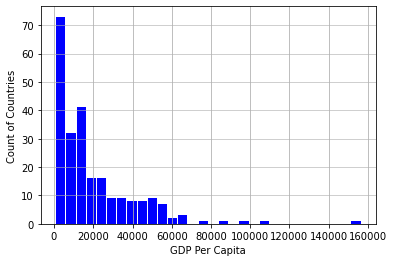

In [197]:
gdp_2014['GDP_Per_Capita'].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='Blue')
plt.xlabel('GDP Per Capita')
plt.ylabel('Count of Countries')
plt.grid(axis='y', alpha=0.75)

12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2014.

In [198]:
gdp_2014.sort_values("GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.

In [199]:
gdp_pivoted = (gdp_df[gdp_df['Year'].isin([1990,2017])].pivot_table(values = 'GDP_Per_Capita',index = 'Country',columns = 'Year').dropna())
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [200]:
gdp_pivoted['Percent_Change'] = (gdp_pivoted[2017] - gdp_pivoted[1990]) / (gdp_pivoted[1990]) * 100
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4842.734635,12811.759436,164.556297
Algeria,8746.352901,11737.409353,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551675,19840.076123,28.335391
Arab World,9694.667544,14555.474921,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385518,67.902197


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?


In [201]:
gdp_pivoted[gdp_pivoted['Percent_Change'] <= 0]

Year,1990,2017,Percent_Change
Country,,,
Brunei,71230.862143,60995.681114,-14.369026
Burundi,1184.842440,773.571858,-34.710993
Central African Republic,1201.677234,912.802052,-24.039332
Comoros,3061.360665,3032.254682,-0.950753
Congo,5115.210903,4274.296414,-16.439488
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
Gabon,18179.265733,15006.764091,-17.451209
Guinea-Bissau,1994.669656,1925.237737,-3.480873
Haiti,3229.618638,2980.960856,-7.699292


16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [202]:
gdp_pivoted.sort_values('Percent_Change', ascending = False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281
Myanmar,619.645144,4739.910118,664.939443
East Asia & Pacific (excluding high income),2173.223895,12986.322227,497.560254
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,497.334945
...,...,...,...
Central African Republic,1201.677234,912.802052,-24.039332
Ukraine,15751.722440,11871.123624,-24.636028
Burundi,1184.842440,773.571858,-34.710993


In [203]:
gdp_pivoted = (gdp_df.pivot_table(values = 'GDP_Per_Capita',index = 'Country',columns = 'Year').dropna())
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,11642.194485,11510.557088
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,21115.798269,21910.184985
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,14622.065826,14602.938214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3239.887824,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194,3128.469953,3153.015168
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,7586.384939,8041.178551
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518,16636.415941,16911.193295


In [204]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


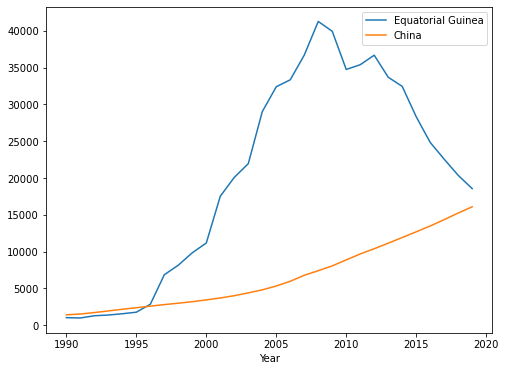

In [205]:
fig, ax = plt.subplots(figsize = (8, 6))
gdp_df[gdp_df['Country'] == 'Equatorial Guinea'].plot(x='Year', y='GDP_Per_Capita', ax = ax)
gdp_df[gdp_df['Country'] == 'China'].plot(x='Year', y='GDP_Per_Capita', ax = ax)
ax.legend(labels=['Equatorial Guinea', 'China'])
plt.show()

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [206]:
continents = pd.read_csv('../data/continents.csv', skipfooter=2, engine='python')
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
209,Europe,Vatican City
210,South America,Venezuela
211,Asia,Vietnam
212,Asia,West Bank and Gaza


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [207]:
gdp_df = pd.merge(gdp_df, continents)
print(gdp_df)

                 Country  Year  GDP_Per_Capita Continent
0            Afghanistan  2019     2065.036398      Asia
1            Afghanistan  2018     2033.779002      Asia
2            Afghanistan  2017     2058.383832      Asia
3            Afghanistan  2016     2057.062164      Asia
4            Afghanistan  2015     2068.265904      Asia
...                  ...   ...             ...       ...
5378  West Bank and Gaza  1998     4786.480266      Asia
5379  West Bank and Gaza  1997     4294.746119      Asia
5380  West Bank and Gaza  1996     3916.925781      Asia
5381  West Bank and Gaza  1995     4047.128464      Asia
5382  West Bank and Gaza  1994     3951.205463      Asia

[5383 rows x 4 columns]


19. Determine the number of countries per continent. Create a bar chart showing this.

<AxesSubplot:xlabel='Continent'>

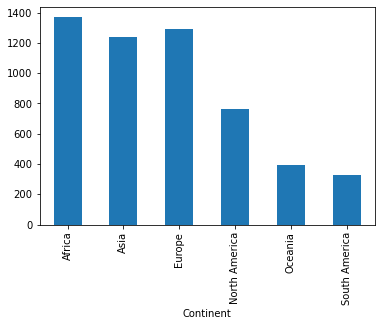

In [208]:
gdp_df.groupby('Continent')['Country'].count().plot(kind='bar')

20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [209]:
import seaborn as sns

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Continent'>

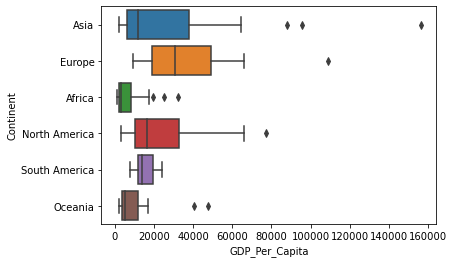

In [210]:
sns.boxplot(x='GDP_Per_Capita', y='Continent', data=gdp_df[gdp_df['Year'] == 2014])

In [211]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv', skiprows=3)
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683,71.087805,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,66.181000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.379000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,64.194000,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use `.melt()` to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [212]:
life_expectancy = life_expectancy.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

In [213]:
life_expectancy = life_expectancy.melt(id_vars='Country Name').dropna()

In [214]:
life_expectancy = life_expectancy.rename(columns= {'Country Name': 'Country', 'variable': 'Year', 'value': 'Life_Expectancy'})

23. What was the first country with a life expectancy to exceed 80?

In [215]:
life_expectancy.loc[life_expectancy['Life_Expectancy'] >= 80].sort_values('Year', ascending = True)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
10204,"Hong Kong SAR, China",1998,80.131707
10227,Japan,1998,80.501463
...,...,...,...
16037,France,2020,82.175610
16038,Faroe Islands,2020,83.092683
16041,United Kingdom,2020,80.902439
16053,Guam,2020,80.277000


24. Merge `gdp_per_capita` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [216]:
gdp_df.sort_values('Year', ascending = True)

,Country,Year,GDP_Per_Capita,Continent
4437,South Africa,1990,10296.440844,Africa
1433,Ecuador,1990,8293.738243,South America
285,Austria,1990,37560.398965,Europe
4857,The Gambia,1990,2265.238219,Africa
137,Antigua and Barbuda,1990,15459.551675,North America
...,...,...,...,...
1277,Dem. Rep. Congo,2019,1097.948853,Africa
138,Argentina,2019,22063.904372,South America
3743,Panama,2019,31458.692626,North America
3923,Portugal,2019,34904.685771,Europe


In [217]:
gdp_df['Year'] = gdp_df['Year'].astype(str)

In [218]:
life_expectancy['Year']=gdp_df['Year'].astype(str)

In [219]:
gdp_le = pd.merge(life_expectancy, gdp_df, on = ['Year', 'Country'])
gdp_le

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent
0,Afghanistan,2017,32.446000,2058.383832,Asia
1,Angola,2015,37.524000,8036.410610,Africa
2,Albania,2014,62.283000,11623.866679,Europe
3,United Arab Emirates,2011,51.537000,56123.486157,Asia
4,Argentina,2010,65.055000,23521.270176,South America
...,...,...,...,...,...
3196,Czech Republic,2002,70.278049,26373.573797,Europe
3197,Germany,2001,72.677902,43651.395915,Europe
3198,Denmark,1998,74.101707,46243.565994,Europe
3199,Dominican Republic,1997,62.861000,8255.564811,North America


25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

In [220]:
gdp_le_2019 = gdp_le.loc[gdp_le['Year'] == '2019']
gdp_le_2019.loc[gdp_le_2019['Life_Expectancy'] >= 80].count()

Country            0
Year               0
Life_Expectancy    0
GDP_Per_Capita     0
Continent          0
dtype: int64

26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [221]:
gdp_le_2019.nlargest(4,'GDP_Per_Capita')

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent
1960,"Macao SAR, China",2019,68.865000,123965.286432,Asia
440,Qatar,2019,61.851000,90043.926180,Asia
441,Qatar,2019,62.610000,90043.926180,Asia
646,Ireland,2019,70.272927,86826.335102,Europe


In [222]:
gdp_le.head()

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent
0,Afghanistan,2017,32.446,2058.383832,Asia
1,Angola,2015,37.524,8036.410610,Africa
2,Albania,2014,62.283,11623.866679,Europe
3,United Arab Emirates,2011,51.537,56123.486157,Asia
4,Argentina,2010,65.055,23521.270176,South America


In [227]:
gdp_le_top_2019 = gdp_le.loc[gdp_le['Country'].isin(['Macao SAR, China', 'Qatar', 'Ireland'])]
gdp_le_top_2019.sort_values('Year')

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent
1778,Ireland,1990,70.844293,26448.289360,Europe
2423,Ireland,1993,71.345561,28111.810533,Europe
3006,"Macao SAR, China",1993,73.209000,55589.533390,Asia
1938,Ireland,1994,70.937878,29612.917116,Europe
2731,"Macao SAR, China",1995,72.352000,57485.902171,Asia
3164,"Macao SAR, China",1996,73.602000,56101.058281,Asia
2243,"Macao SAR, China",1998,70.384000,51270.255529,Asia
2995,Ireland,1998,72.173732,40652.082658,Europe
2888,"Macao SAR, China",1999,72.793000,49011.713248,Asia
2707,Ireland,2000,71.782780,47970.345284,Europe


In [238]:
gdp_le_top_2019['Year'].value_counts()

2013    7
2018    5
2015    4
2019    4
2012    3
2004    3
2001    3
2011    2
1998    2
2017    2
2014    2
2008    2
2007    2
2005    2
2002    2
2003    2
1993    2
1995    1
2000    1
1999    1
2016    1
1994    1
1990    1
2006    1
1996    1
Name: Year, dtype: int64

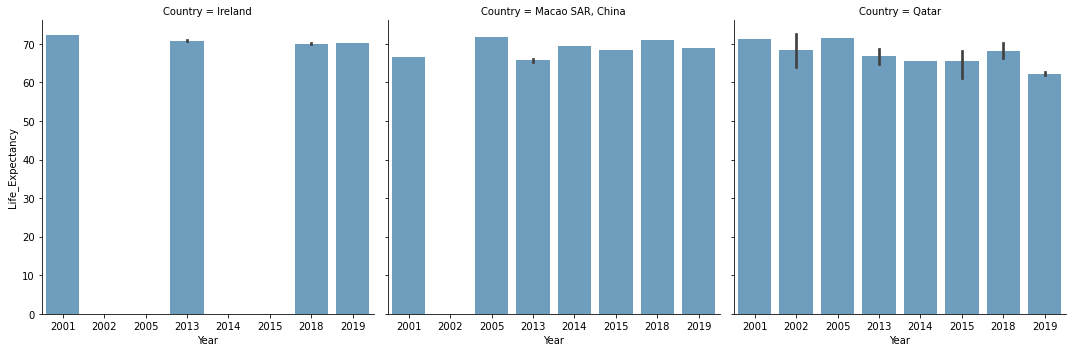

In [243]:
g = sns.FacetGrid(gdp_le_top_2019, col='Country', height=5)
g.map(sns.barplot, 'Year', 'Life_Expectancy', order = ['2001', '2002', '2005', '2013', '2014', '2015', '2018', '2019'], alpha=0.7);

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

<AxesSubplot:xlabel='Life_Expectancy', ylabel='GDP_Per_Capita'>

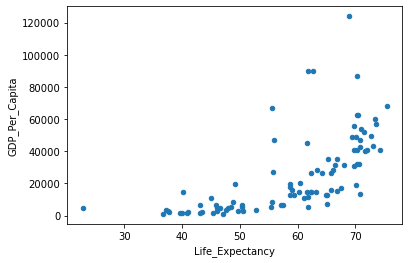

In [245]:
gdp_le_2019.plot.scatter(x='Life_Expectancy', y='GDP_Per_Capita')

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

In [248]:
gdp_le_series = pd.DataFrame(gdp_le, columns = ['Life_Expectancy', 'GDP_Per_Capita'])

print(gdp_le_series)

      Life_Expectancy  GDP_Per_Capita
0           32.446000     2058.383832
1           37.524000     8036.410610
2           62.283000    11623.866679
3           51.537000    56123.486157
4           65.055000    23521.270176
...               ...             ...
3196        70.278049    26373.573797
3197        72.677902    43651.395915
3198        74.101707    46243.565994
3199        62.861000     8255.564811
3200        58.198000     8116.962721

[3201 rows x 2 columns]


In [249]:
gdp_le_series.corr(method='pearson')

,Life_Expectancy,GDP_Per_Capita
Life_Expectancy,1.000000,0.577238
GDP_Per_Capita,0.577238,1.000000


29. Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [252]:
gdp_le_2019['logarithm_base10'] = np.log(gdp_le_2019['GDP_Per_Capita'])

C:\Users\Pupnsuds90\AppData\Local\Temp\ipykernel_23320\3209268618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['logarithm_base10'] = np.log(gdp_le_2019['GDP_Per_Capita'])
